In [1]:
# Import Librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


In [2]:
# read dataset using pandas function
Gold_dataset = pd.read_csv("gold_price_data.csv")

In [3]:
# information about the dataset
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
# print first 5 rows in the dataframe
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Data Description

This is gold price dataset. The dataset gives you information about a gold prices based on serveral other stock prices.

Feature

. Date - mm/dd/yyyy

. SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in US

. USO - United States Oil Fund - Not Sure of UOM

. SLV - Silver Price

. EUR/USD - currency pair quotation of the Euro against the US

Label

. GLD - Gold Price

# Exploratory Data Analysis

. Find Missing Values

. Find Features with one value

. Explore the Categorical Features

. Explore the Numerical Features

. Find Discrete Numerical Features

. Relation between Discrete numerical Features and Labels

. Find Continous Numerical Features

. Distribution of Continous Numerical Features

. Relation between Continous numerical Features and Labels

. Find Outliers in numerical features

. Explore the Correlation between numerical features

In [7]:
# Missing Values/Null Values Count
Gold_dataset.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Find Features with one value
for column in Gold_dataset.columns:
    print(column,Gold_dataset[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


--No feature with only one value--

In [9]:
# Explore the Categorical Features
categorical_features=[feature for feature in Gold_dataset.columns if ((Gold_dataset[feature].dtypes == 'O') & (feature not in ['GLD']) ) ]
categorical_features

['Date']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(Gold_dataset[feature].unique())))

The feature is Date and number of categories are 2290


In [11]:
# Explore the Numerical Variables
# list of numerical variables
numerical_features = [feature for feature in Gold_dataset.columns if ((Gold_dataset[feature].dtypes != 'O') & (feature not in ['GLD' ]) )]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
Gold_dataset[numerical_features].head()

Number of numerical variables:  4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [12]:
# Find Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(Gold_dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [13]:
# Find Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GLD']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


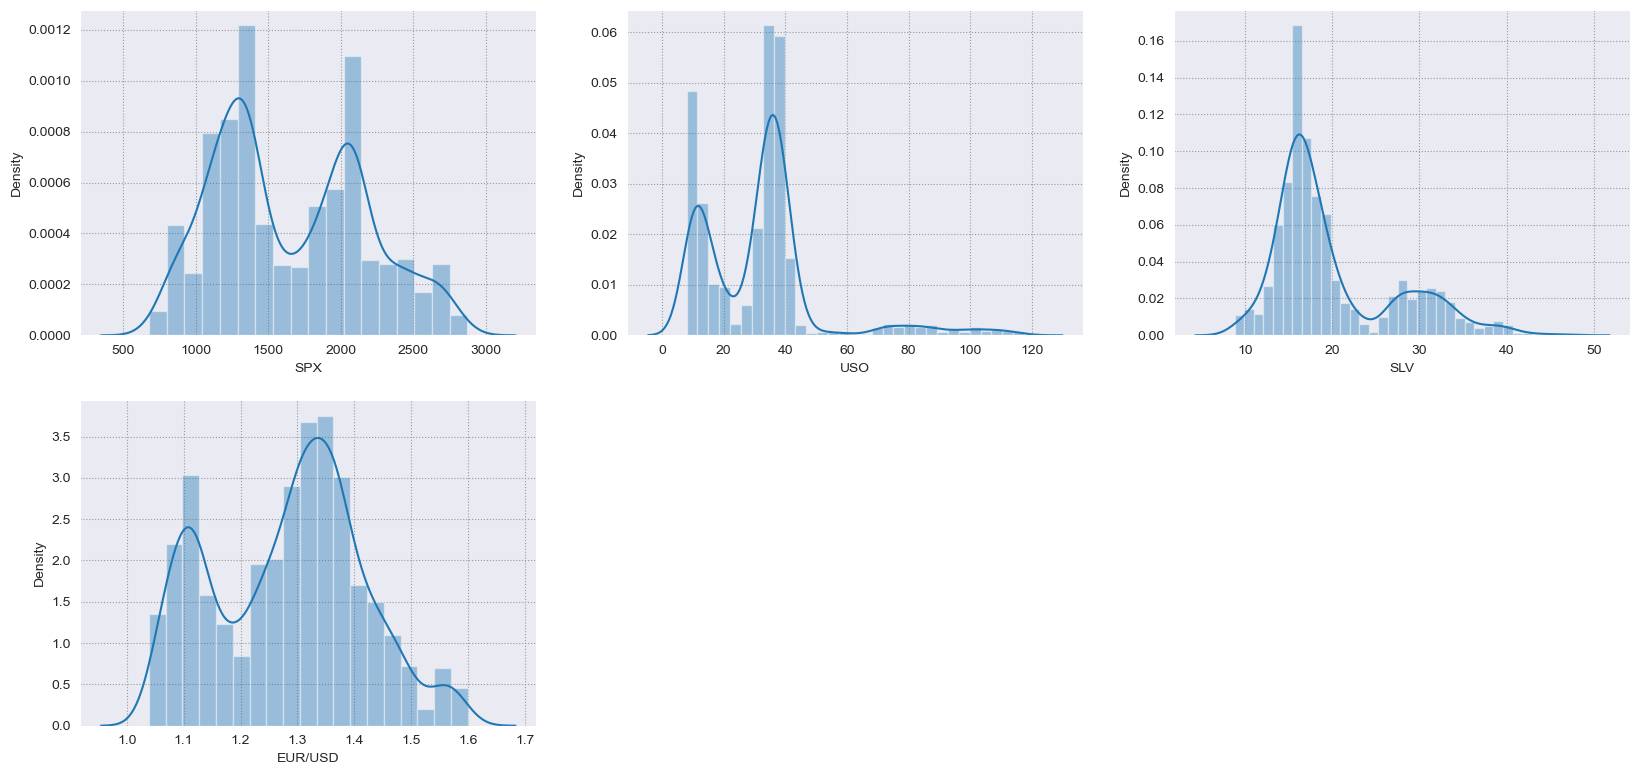

In [14]:
# Distribution of Continuous Numerical Features

#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Gold_dataset[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

--It seems SPX, SLV, and EUR/USD distributed normally

--USO Heavely skewed towards right and seems to be have soome outliers

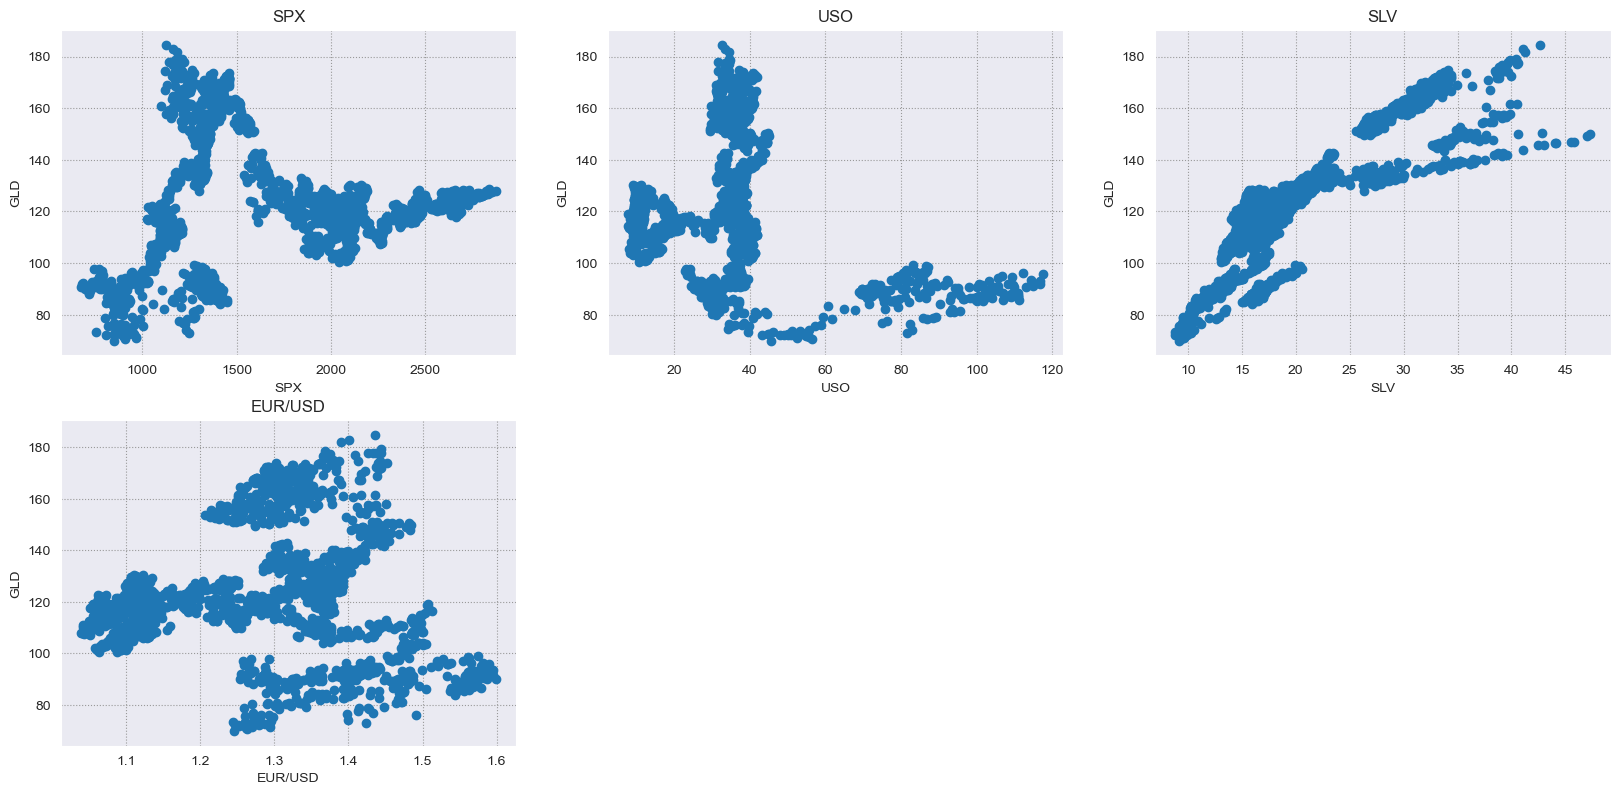

In [15]:
# Relation between Continuous numerical features and Labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=Gold_dataset.copy()
    ax = plt.subplot(12,3, plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

--It seems SLV feature linearly progressing with GLD

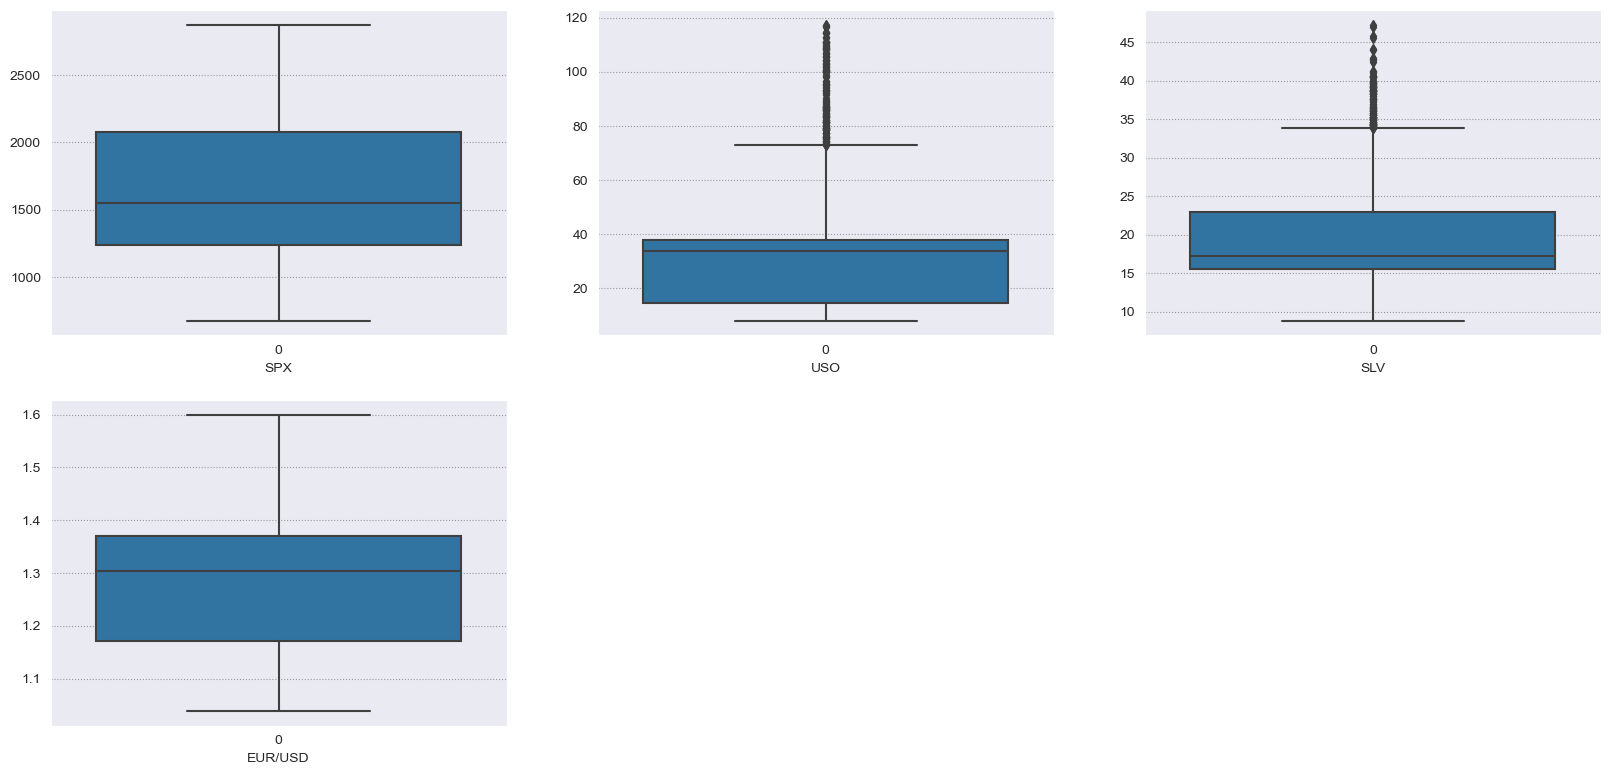

In [16]:
# Find Outliers in numerical features
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Gold_dataset[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

--It seems USO and SLV have some outliers which can be removed in feature engineering 

In [17]:
# getting the statistical measures of the data
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


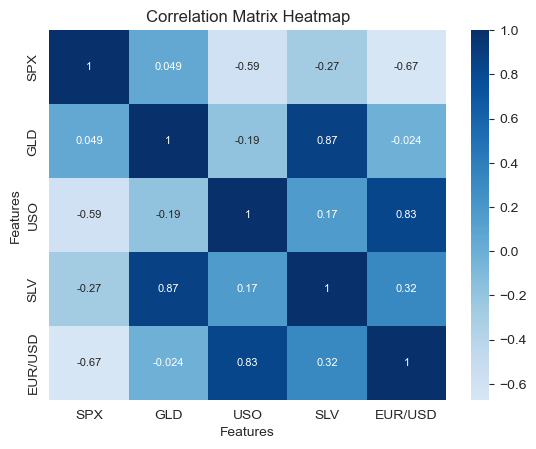

In [18]:
# Explore the Correlation between numerical features
# Calculate correlation matrix
correlation = Gold_dataset.corr()

# Create heatmap
sns.heatmap(correlation, cbar=True, center=0, annot=True, annot_kws={'size':8}, cmap='Blues')

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


-- It seems SLV feature is heavily correlated with GLD

<Axes: xlabel='GLD', ylabel='Density'>

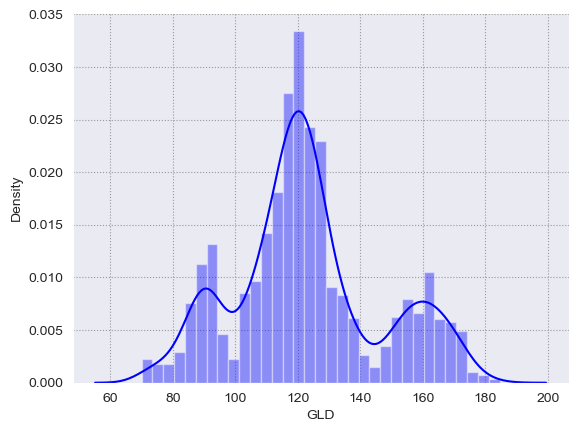

In [20]:
# checking the distribution of the GLD Price
sns.distplot(Gold_dataset['GLD'],color='blue')

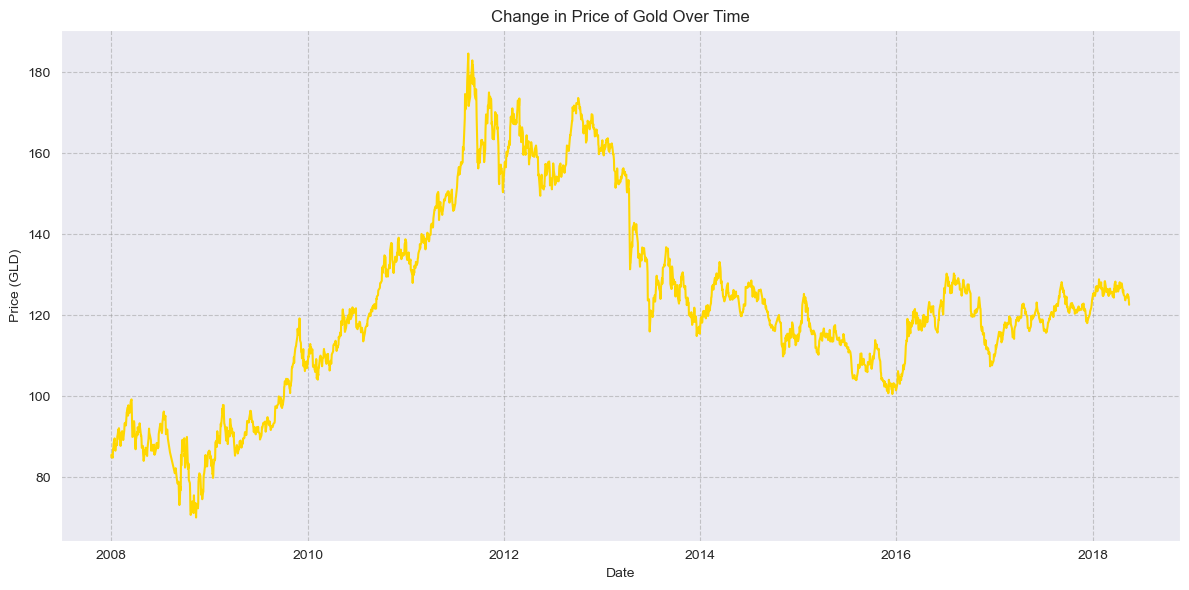

In [28]:
# Ensure date is converted properly
Gold_dataset['Date'] = pd.to_datetime(Gold_dataset['Date'], errors='coerce')

# Plot gold price against actual dates
plt.figure(figsize=(12,6))
plt.plot(Gold_dataset['Date'], Gold_dataset['GLD'], color='gold')

plt.title("Change in Price of Gold Over Time")
plt.xlabel("Date")
plt.ylabel("Price (GLD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()